In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import chi2_contingency

import re
from datetime import datetime
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read file
data = pd.read_csv('sales_data.csv')

In [3]:
len(data)

48867

In [4]:
data.head()

,title,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
0,"Penllwyn Estate, Capel Bangor, Aberystwyth","£185,000",Added on 13/10/2023,Terraced,×3,×1,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,Ask agent,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion
1,"Llechryd, Cardigan, SA43","£4,000,000",Added on 22/12/2021,Detached,×17,×7,Freehold,['Peerless country estate with 20 acres of bea...,Over almost twenty years the current owners ha...,Band: I,"Llechryd, Cardigan, SA43","Country Living Group, Haverfordwest",Unit 29\r\nWithybush Trading Estate\r\nHaverfo...,https://www.rightmove.co.uk/properties/1304715...,Mid Wales,Ceredigion
2,"Maesycrugiau, Nr Llandysul, Ceredigion, SA39","£2,000,000",Added on 08/09/2023,Detached,×26,×11,Freehold,['Impressive Estate set in an idyllic location...,Delightful holiday/event property collection. ...,Band: B,"Maesycrugiau, Nr Llandysul, Ceredigion, SA39","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1397218...,Mid Wales,Ceredigion
3,"St. Dogmaels, Cardigan, Pembrokeshire, SA43","£2,000,000",Reduced on 03/09/2023,Semi-Detached,×6,×3,Freehold,"['Stunning waterfront property', 'Impressive m...",Exciting waterfront property offering a stunni...,Band: F,"St. Dogmaels, Cardigan, Pembrokeshire, SA43","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1364550...,West Wales,Pembrokeshire
4,"Owl Farm, Llangoedmor, Cardigan","£1,750,000",Added on 29/09/2023,Detached,×23,×11,Freehold,['Established & Profitable Holiday Letting Bus...,An exciting and unique opportunity to purchase...,Band: C,"Owl Farm, Llangoedmor, Cardigan","West Wales Properties, Cardigan","41 High Street,\r\nCardigan,\r\nCeredigion, SA...",https://www.rightmove.co.uk/properties/1406071...,Mid Wales,Ceredigion


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48867 entries, 0 to 48866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             33902 non-null  object
 1   price             33902 non-null  object
 2   date              32694 non-null  object
 3   property_type     33794 non-null  object
 4   bedrooms          32710 non-null  object
 5   bathrooms         30775 non-null  object
 6   tenure            32698 non-null  object
 7   key_features      29756 non-null  object
 8   description_text  33902 non-null  object
 9   council_tax       32698 non-null  object
 10  address           33879 non-null  object
 11  agent_name        33902 non-null  object
 12  agent_address     33878 non-null  object
 13  url               48867 non-null  object
 14  part              46545 non-null  object
 15  area              46545 non-null  object
dtypes: object(16)
memory usage: 6.0+ MB


In [6]:
# Remove duplicate
data.drop_duplicates(inplace=True)


In [7]:
data[['price','date','bedrooms','bathrooms']].head()

,price,date,bedrooms,bathrooms
0,"£185,000",Added on 13/10/2023,×3,×1
1,"£4,000,000",Added on 22/12/2021,×17,×7
2,"£2,000,000",Added on 08/09/2023,×26,×11
3,"£2,000,000",Reduced on 03/09/2023,×6,×3
4,"£1,750,000",Added on 29/09/2023,×23,×11


In [8]:
# Function to extract the numeric value from strings
def extract_number(price_string):
    # Use regex to find any sequence of digits (with or without commas) as a number
    match = re.search(r'[\d,]+', str(price_string))  # Convert to string to handle non-string inputs
    if match:
        # Remove commas and return the matched number as a float
        return float(match.group(0).replace(',', ''))
    else:
        return np.nan  # Return NaN if no number is found

# Apply the function to the 'price' column to convert all strings to numbers
data['price'] = data['price'].apply(extract_number)

In [9]:
# function to extract the date from a string
def extract_date(date_string):
    # Use regex to find the date pattern in the string
    match = re.search(r'\b\d{1,2}/\d{1,2}/\d{4}\b', str(date_string))
    if match:
        # Convert the matched pattern to a datetime object
        date = datetime.strptime(match.group(0), '%d/%m/%Y').date()
        return date
    else:
        return None  # Return None if no date is found

# Apply the function to the 'reduced' column to extract dates
data['date'] = data['date'].apply(extract_date)

In [10]:
# Remove '×', convert to numeric, convert to integers bedrooms and bathrooms
data['bedrooms'] = pd.to_numeric(data['bedrooms'].str.replace('×', ''), errors='coerce')
data['bathrooms'] = pd.to_numeric(data['bathrooms'].str.replace('×', ''), errors='coerce')
data.head()

,title,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
0,"Penllwyn Estate, Capel Bangor, Aberystwyth",185000.0,2023-10-13,Terraced,3.0,1.0,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,Ask agent,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion
1,"Llechryd, Cardigan, SA43",4000000.0,2021-12-22,Detached,17.0,7.0,Freehold,['Peerless country estate with 20 acres of bea...,Over almost twenty years the current owners ha...,Band: I,"Llechryd, Cardigan, SA43","Country Living Group, Haverfordwest",Unit 29\r\nWithybush Trading Estate\r\nHaverfo...,https://www.rightmove.co.uk/properties/1304715...,Mid Wales,Ceredigion
2,"Maesycrugiau, Nr Llandysul, Ceredigion, SA39",2000000.0,2023-09-08,Detached,26.0,11.0,Freehold,['Impressive Estate set in an idyllic location...,Delightful holiday/event property collection. ...,Band: B,"Maesycrugiau, Nr Llandysul, Ceredigion, SA39","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1397218...,Mid Wales,Ceredigion
3,"St. Dogmaels, Cardigan, Pembrokeshire, SA43",2000000.0,2023-09-03,Semi-Detached,6.0,3.0,Freehold,"['Stunning waterfront property', 'Impressive m...",Exciting waterfront property offering a stunni...,Band: F,"St. Dogmaels, Cardigan, Pembrokeshire, SA43","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1364550...,West Wales,Pembrokeshire
4,"Owl Farm, Llangoedmor, Cardigan",1750000.0,2023-09-29,Detached,23.0,11.0,Freehold,['Established & Profitable Holiday Letting Bus...,An exciting and unique opportunity to purchase...,Band: C,"Owl Farm, Llangoedmor, Cardigan","West Wales Properties, Cardigan","41 High Street,\r\nCardigan,\r\nCeredigion, SA...",https://www.rightmove.co.uk/properties/1406071...,Mid Wales,Ceredigion


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48867 entries, 0 to 48866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             33902 non-null  object 
 1   price             32694 non-null  float64
 2   date              32598 non-null  object 
 3   property_type     33794 non-null  object 
 4   bedrooms          32710 non-null  float64
 5   bathrooms         30775 non-null  float64
 6   tenure            32698 non-null  object 
 7   key_features      29756 non-null  object 
 8   description_text  33902 non-null  object 
 9   council_tax       32698 non-null  object 
 10  address           33879 non-null  object 
 11  agent_name        33902 non-null  object 
 12  agent_address     33878 non-null  object 
 13  url               48867 non-null  object 
 14  part              46545 non-null  object 
 15  area              46545 non-null  object 
dtypes: float64(3), object(13)
memory usage: 

In [12]:
data[['price','date','bedrooms','bathrooms']].head()

,price,date,bedrooms,bathrooms
0,185000.0,2023-10-13,3.0,1.0
1,4000000.0,2021-12-22,17.0,7.0
2,2000000.0,2023-09-08,26.0,11.0
3,2000000.0,2023-09-03,6.0,3.0
4,1750000.0,2023-09-29,23.0,11.0


#### Missing value

In [13]:
# Check null value
data.isnull().sum()

title               14965
price               16173
date                16269
property_type       15073
bedrooms            16157
bathrooms           18092
tenure              16169
key_features        19111
description_text    14965
council_tax         16169
address             14988
agent_name          14965
agent_address       14989
url                     0
part                 2322
area                 2322
dtype: int64

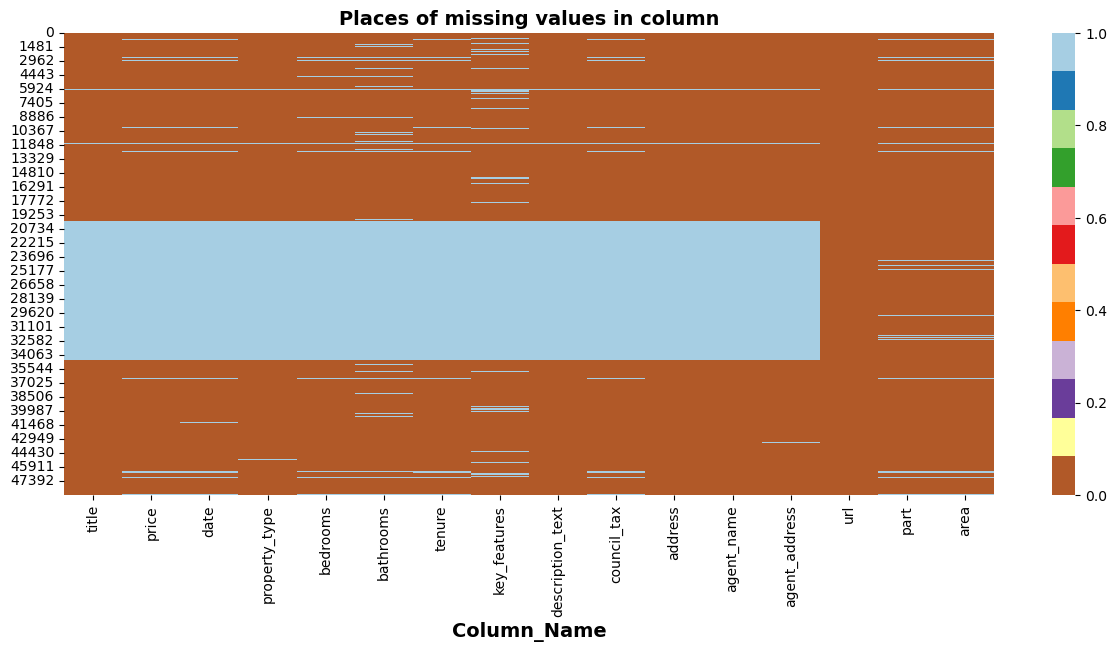

In [14]:
# Heatmap representation of missing values
plt.figure(figsize=(15, 6))
sns.heatmap(data.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [15]:
data = data.dropna(subset=['price'])

In [16]:
len(data[data['property_type'].isnull()])

108

In [17]:
data = data.dropna(subset=['property_type'])

In [18]:
len(data[data['bedrooms'].isnull()])

284

In [19]:
# Remove row nan data['bedrooms']
data.dropna(subset=['bedrooms'], inplace=True)


In [20]:
# bathrooms
len(data[data['bathrooms'].isna()])

1937

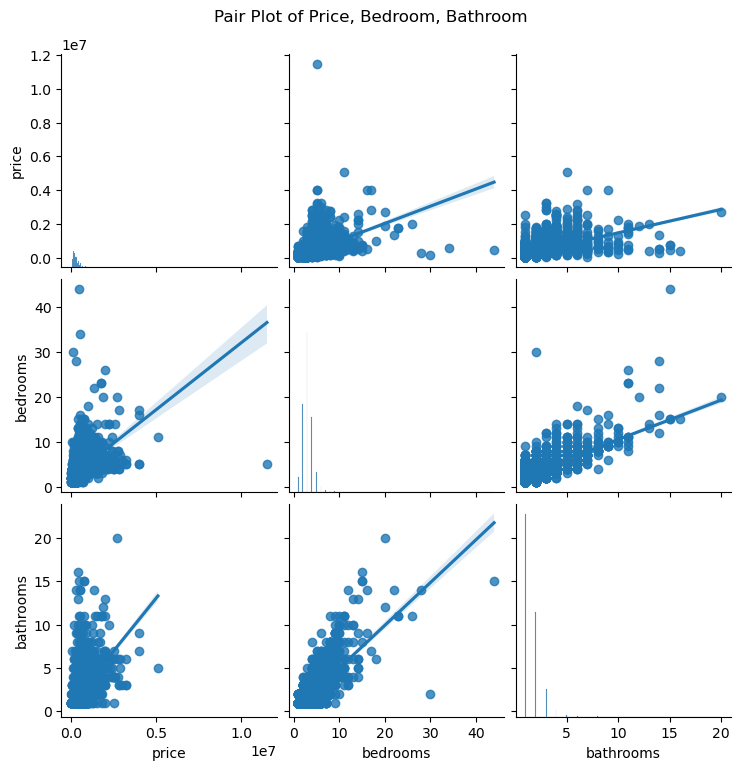

In [21]:
# Subset the data to include only the relevant columns
data_subset = data[["price", "bedrooms", "bathrooms"]]

# Create a pair plot (scatterplot matrix)
pair_plot = sns.pairplot(data_subset, kind='reg')
pair_plot.fig.suptitle("Pair Plot of Price, Bedroom, Bathroom", y=1.02)

# Show the pair plot
plt.show()

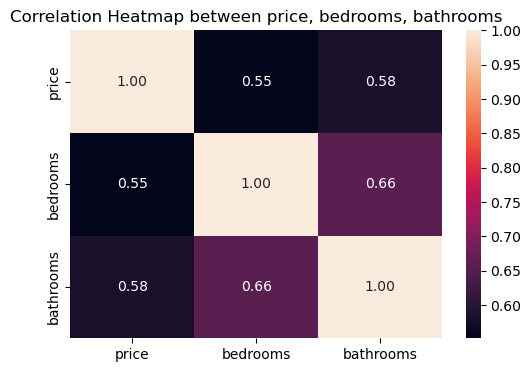

In [22]:

# columns
selected_columns = ['price','bedrooms', 'bathrooms']

# Calculate Cramér's V
corr_matrix = data[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Heatmap between price, bedrooms, bathrooms')
plt.show()


In [23]:
# correlation between 'price', 'bedrooms', 'bathrooms'
print('correlation between price and the bedrooms:',data['price'].corr(data['bedrooms']))
print('correlation between price and the bathrooms:',data['price'].corr(data['bathrooms']))
print('correlation between bedrooms and the bedrooms:', data['bedrooms'].corr(data['bathrooms']))

correlation between price and the bedrooms: 0.5515534311823452
correlation between price and the bathrooms: 0.582176560838994
correlation between bedrooms and the bedrooms: 0.6570945970948672


In [24]:
# data with not nan bathrooms
data_bathrooms = data[~data['bathrooms'].isna()]


In [25]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

X = data_bathrooms[['price', 'bedrooms']]  # Independent variables
y = data_bathrooms['bathrooms']   # Dependent variable

# Creating and fitting the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [26]:
from sklearn.metrics import r2_score

# Make predictions
y_pred = model.predict(X)

# Calculate R-squared
r_squared = r2_score(y, y_pred)
print(f"R-squared: {r_squared}")


R-squared: 0.49199297447553525


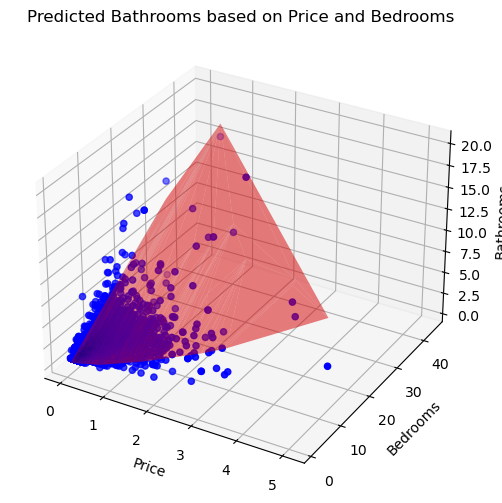

In [27]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'model', 'X', 'y', 'y_pred' are already defined from your previous code snippet

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Extracting individual columns from the DataFrame
price = X['price']
bedrooms = X['bedrooms']

# Scatter plot for the actual data points
ax.scatter(price, bedrooms, y, color='blue', label='Actual Data')

# Surface plot for the predicted data
ax.plot_trisurf(price, bedrooms, y_pred, color='red', alpha=0.5)

ax.set_xlabel('Price')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Bathrooms')
ax.set_title('Predicted Bathrooms based on Price and Bedrooms')

plt.show()


In [28]:
# Filter rows where 'bathrooms' is zero
nan_bathrooms = data[data['bathrooms'].isna()]

# Separate the data for prediction
X_pred = nan_bathrooms[['price', 'bedrooms']]

# Predict 'bathrooms' based on 'bedrooms'
predicted_bathrooms = model.predict(X_pred)

# Replace zero 'bathrooms' with predicted values
data.loc[data['bathrooms'].isna(), 'bathrooms'] = np.round(predicted_bathrooms)

In [29]:
data.head()

,title,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
0,"Penllwyn Estate, Capel Bangor, Aberystwyth",185000.0,2023-10-13,Terraced,3.0,1.0,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,Ask agent,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion
1,"Llechryd, Cardigan, SA43",4000000.0,2021-12-22,Detached,17.0,7.0,Freehold,['Peerless country estate with 20 acres of bea...,Over almost twenty years the current owners ha...,Band: I,"Llechryd, Cardigan, SA43","Country Living Group, Haverfordwest",Unit 29\r\nWithybush Trading Estate\r\nHaverfo...,https://www.rightmove.co.uk/properties/1304715...,Mid Wales,Ceredigion
2,"Maesycrugiau, Nr Llandysul, Ceredigion, SA39",2000000.0,2023-09-08,Detached,26.0,11.0,Freehold,['Impressive Estate set in an idyllic location...,Delightful holiday/event property collection. ...,Band: B,"Maesycrugiau, Nr Llandysul, Ceredigion, SA39","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1397218...,Mid Wales,Ceredigion
3,"St. Dogmaels, Cardigan, Pembrokeshire, SA43",2000000.0,2023-09-03,Semi-Detached,6.0,3.0,Freehold,"['Stunning waterfront property', 'Impressive m...",Exciting waterfront property offering a stunni...,Band: F,"St. Dogmaels, Cardigan, Pembrokeshire, SA43","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1364550...,West Wales,Pembrokeshire
4,"Owl Farm, Llangoedmor, Cardigan",1750000.0,2023-09-29,Detached,23.0,11.0,Freehold,['Established & Profitable Holiday Letting Bus...,An exciting and unique opportunity to purchase...,Band: C,"Owl Farm, Llangoedmor, Cardigan","West Wales Properties, Cardigan","41 High Street,\r\nCardigan,\r\nCeredigion, SA...",https://www.rightmove.co.uk/properties/1406071...,Mid Wales,Ceredigion


In [30]:
data['bedrooms'] = data['bedrooms'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32302 entries, 0 to 48857
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             32302 non-null  object 
 1   price             32302 non-null  float64
 2   date              32204 non-null  object 
 3   property_type     32302 non-null  object 
 4   bedrooms          32302 non-null  int32  
 5   bathrooms         32302 non-null  int32  
 6   tenure            32302 non-null  object 
 7   key_features      28440 non-null  object 
 8   description_text  32302 non-null  object 
 9   council_tax       32302 non-null  object 
 10  address           32279 non-null  object 
 11  agent_name        32302 non-null  object 
 12  agent_address     32278 non-null  object 
 13  url               32302 non-null  object 
 14  part              32302 non-null  object 
 15  area              32302 non-null  object 
dtypes: float64(1), int32(2), object(13)
memo

In [32]:
# Fill nan date by crawled data (11/11/2023)
fill_date = pd.to_datetime('2023-11-11')
data['date'].fillna(fill_date, inplace=True)

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32302 entries, 0 to 48857
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             32302 non-null  object        
 1   price             32302 non-null  float64       
 2   date              32302 non-null  datetime64[ns]
 3   property_type     32302 non-null  object        
 4   bedrooms          32302 non-null  int32         
 5   bathrooms         32302 non-null  int32         
 6   tenure            32302 non-null  object        
 7   key_features      28440 non-null  object        
 8   description_text  32302 non-null  object        
 9   council_tax       32302 non-null  object        
 10  address           32279 non-null  object        
 11  agent_name        32302 non-null  object        
 12  agent_address     32278 non-null  object        
 13  url               32302 non-null  object        
 14  part              3230

In [34]:
data[data['address'].isnull()].head()

,title,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
5361,"Clawddnewydd, LL15 2NF",275000.0,2023-10-05,Detached,2,1,Freehold,['A VERY RARE OPPORTUNITY TO BUY A HOUSE LIKE ...,Berry and George Estates was formed to make se...,Ask agent,NaN,"Berry and George, Nercwys","The Office, Ffordd Pentre Bach,\r\nNercwys,\r\...",https://www.rightmove.co.uk/properties/1408157...,North Wales,Denbighshire
5848,"Pont Y Mwynwr Road, Maeshafn, CH7 5LR",425000.0,2023-09-18,Detached Bungalow,3,1,Freehold,"['STYLISH DETACHED BUNGALOW', 'LARGE PRIVATE R...",Berry and George Estates was formed to make se...,Ask agent,NaN,"Berry and George, Nercwys","The Office, Ffordd Pentre Bach,\r\nNercwys,\r\...",https://www.rightmove.co.uk/properties/1400996...,North Wales,Denbighshire
6472,"Ash Cottage, Bretton Lane, CH4",445000.0,2023-11-13,Detached,4,2,Freehold,['** BEST PRICED 3-5 BED DETACHED FAMILY HOME ...,Berry and George Estates was formed to make se...,Ask agent,NaN,"Berry and George, Nercwys","The Office, Ffordd Pentre Bach,\r\nNercwys,\r\...",https://www.rightmove.co.uk/properties/1400615...,North Wales,Flintshire
6523,"Ruthin Road, Mold, CH7",420000.0,2023-09-19,Detached,5,4,Freehold,"['FOUR / FIVE BED VERSATILE DETACHED HOME', 'L...",Berry and George Estates was formed to make se...,Ask agent,NaN,"Berry and George, Nercwys","The Office, Ffordd Pentre Bach,\r\nNercwys,\r\...",https://www.rightmove.co.uk/properties/1401695...,North Wales,Flintshire
6748,"Llys Nercwys, Mold, CH7",285000.0,2023-09-19,Detached,3,2,Freehold,"['FOUR BEDROOM DETACHED PROPERTY', 'EN-SUITE T...",Berry and George Estates was formed to make se...,Ask agent,NaN,"Berry and George, Nercwys","The Office, Ffordd Pentre Bach,\r\nNercwys,\r\...",https://www.rightmove.co.uk/properties/1401452...,North Wales,Flintshire


In [35]:
len(data[data['address'].isnull()].head())

5

In [36]:
# Fill NaN values in 'address' column with values from 'title'
data['address'].fillna(data['title'], inplace=True)

In [37]:
# council_tax
data['council_tax'].value_counts()

Ask agent        9978
Band: C          4448
Band: D          4103
Band: E          3573
Band: TBC        2574
Band: B          2419
Band: F          2152
Band: A          1273
Band: G          1036
Ask developer     290
Band: H           280
Band: I           122
Exempt             54
Name: council_tax, dtype: int64

In [38]:
# Not identify value replace by nan value
data['council_tax'].replace(['Ask agent', 'Ask developer', 'Exempt', 'Band: TBC'], np.nan, inplace=True)


In [39]:
data['council_tax'].value_counts()

Band: C    4448
Band: D    4103
Band: E    3573
Band: B    2419
Band: F    2152
Band: A    1273
Band: G    1036
Band: H     280
Band: I     122
Name: council_tax, dtype: int64

In [40]:
len(data['council_tax'].isna())

32302

### outlier

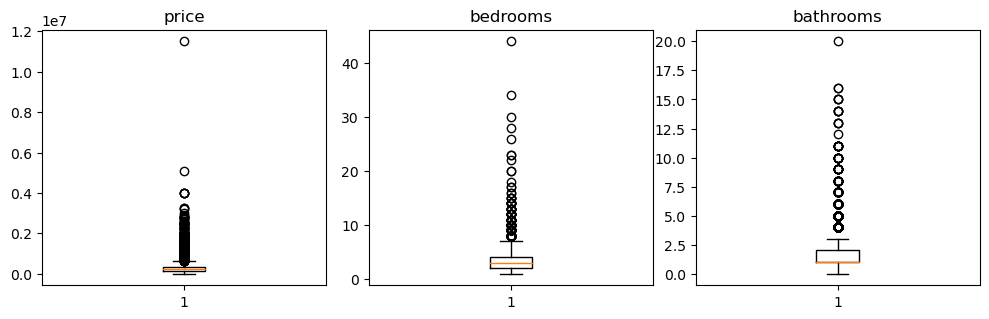

In [41]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.boxplot(data['price'])
plt.title('price')

plt.subplot(2, 3, 2)
plt.boxplot(data['bedrooms'])
plt.title('bedrooms')

plt.subplot(2, 3, 3)
plt.boxplot(data['bathrooms'])
plt.title('bathrooms')

plt.tight_layout()
plt.show()


In [42]:
# Statistical summary 2% ~ 98%
data.describe(percentiles=[0.02, 0.98])

,price,bedrooms,bathrooms
count,3.230200e+04,32302.000000,32302.000000
mean,2.976342e+05,3.109157,1.577549
std,2.293086e+05,1.237815,0.911916
min,1.000000e+04,1.000000,0.000000
2%,7.500000e+04,1.000000,1.000000
50%,2.450000e+05,3.000000,1.000000
98%,8.750000e+05,6.000000,4.000000
max,1.150000e+07,44.000000,20.000000


In [43]:
len(data[data['bedrooms']>20])

8

In [44]:
data[data['bedrooms']>20]

,title,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
2,"Maesycrugiau, Nr Llandysul, Ceredigion, SA39",2000000.0,2023-09-08,Detached,26,11,Freehold,['Impressive Estate set in an idyllic location...,Delightful holiday/event property collection. ...,Band: B,"Maesycrugiau, Nr Llandysul, Ceredigion, SA39","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1397218...,Mid Wales,Ceredigion
4,"Owl Farm, Llangoedmor, Cardigan",1750000.0,2023-09-29,Detached,23,11,Freehold,['Established & Profitable Holiday Letting Bus...,An exciting and unique opportunity to purchase...,Band: C,"Owl Farm, Llangoedmor, Cardigan","West Wales Properties, Cardigan","41 High Street,\r\nCardigan,\r\nCeredigion, SA...",https://www.rightmove.co.uk/properties/1406071...,Mid Wales,Ceredigion
5,"Owl Farm, Llangoedmor, Cardigan",1750000.0,2023-09-29,Detached,23,11,Freehold,['Established & Profitable Holiday Letting Bus...,An exciting and unique opportunity to purchase...,Band: C,"Owl Farm, Llangoedmor, Cardigan","West Wales Finest Properties, Carmarthen","9 Dark Gate,\r\nCarmarthen,\r\nSA31 1PT",https://www.rightmove.co.uk/properties/1406071...,Mid Wales,Ceredigion
1133,"Talybont-on-Usk, Brecon, Powys, LD3",1350000.0,2023-10-11,Detached,22,14,Freehold,['Attractive country house in a delightful rur...,Attractive and large country house offering ex...,Band: G,"Talybont-on-Usk, Brecon, Powys, LD3","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1379740...,Mid Wales,Powys
11064,2022 Pemberton Rivington - Plas Coch Caravan &...,136600.0,2022-08-22,Mobile Home,30,2,Ask agent,"['Property Ref - IW0179', ""Dimensions: 13' x 4...",Property Ref - IW0179\nLocation - Plas Coch Lu...,NaN,2022 Pemberton Rivington - Plas Coch Caravan &...,"IWJ Property Group, Powered by eXp UK, coverin...",covering North Wales,https://www.rightmove.co.uk/properties/1276736...,North Wales,Isle Of Anglesey
45964,"Thornhill Road, Cwmgwili, Llanelli, SA14",300000.0,2023-07-21,Detached,28,14,Freehold,"['** Substantial 32 Bed Care Home **', '** Rec...",*** PLEASE NOTE : INFORMAL TENDERS INVITED TO ...,NaN,"Thornhill Road, Cwmgwili, Llanelli, SA14","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1376890...,West Wales,Carmarthenshire
47198,Yha Poppit Sands - 34 Bed Hostel With Outstand...,550000.0,2023-09-27,Detached,34,13,Freehold,['Opportunity to acquire a unique freehold pro...,YHA Poppit Sands is located on a small lane ap...,NaN,Yha Poppit Sands - 34 Bed Hostel With Outstand...,"Sidney Phillips Limited, Wales","Shepherds Meadow,\r\nEaton Bishop,\r\nHR2 9UA",https://www.rightmove.co.uk/properties/1405167...,West Wales,Pembrokeshire
47284,"Llawhaden, Narberth, SA67",450000.0,2023-07-21,Detached,44,15,Freehold,"['** Substantial former care home **', '** 44 ...",**PLEASE NOTE : INFORMAL TENDERS INVITED TO TH...,Band: I,"Llawhaden, Narberth, SA67","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1376867...,West Wales,Pembrokeshire


In [45]:
data = data[(data["price"] <= 8.750000e+05) & 
            (data['bedrooms']<=20)].reset_index(drop=True)

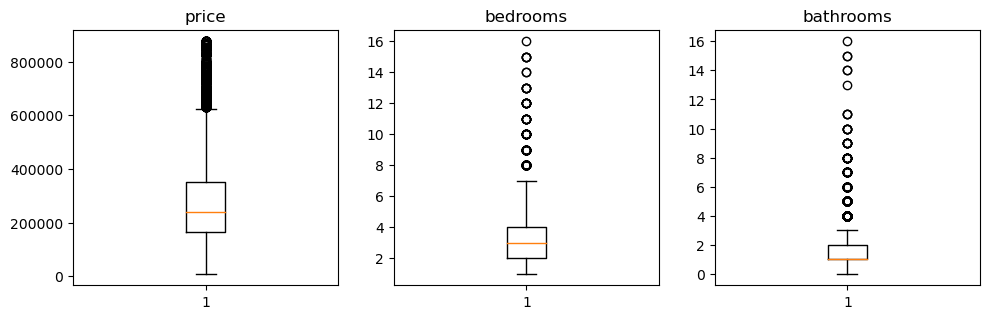

In [46]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.boxplot(data['price'])
plt.title('price')

plt.subplot(2, 3, 2)
plt.boxplot(data['bedrooms'])
plt.title('bedrooms')

plt.subplot(2, 3, 3)
plt.boxplot(data['bathrooms'])
plt.title('bathrooms')

plt.tight_layout()
plt.show()

In [47]:
columns_to_drop = ['title']
data.drop(columns=columns_to_drop, inplace=True)


In [48]:
data.head()

,price,date,property_type,bedrooms,bathrooms,tenure,key_features,description_text,council_tax,address,agent_name,agent_address,url,part,area
0,185000.0,2023-10-13,Terraced,3,1,Freehold,"['Oil Central Heating', 'Freehold Semi-Detache...",Spacious 3 Bedroom Semi-Detached property situ...,NaN,"Penllwyn Estate, Capel Bangor, Aberystwyth","M S PROPERTIES (UK) LIMITED, Aberystwyth","23 Chalybeate Street,\r\nAberystwyth,\r\nSY23 1HX",https://www.rightmove.co.uk/properties/8664108...,Mid Wales,Ceredigion
1,875000.0,2023-06-16,Detached,5,3,Freehold,"['** Iconic Victorian residence **', '** 5 Bed...",** Fully refurbished Victorian town house ** H...,Band: C,"Llanbadarn Road, Llanbadarn Fawr, Aberystwyth,...","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1315985...,Mid Wales,Ceredigion
2,875000.0,2022-06-01,Detached,10,6,Freehold,"['EPC: E', 'Council Tax Band: F', 'Broadband-...","Windrush House, dating back to 1872, has under...",Band: F,"Windrush, Llanrhystud, Ceredigion.","Fine and Country West Wales, Aberystwyth",The Gallery\r\nStation Approach\r\nAlexandra R...,https://www.rightmove.co.uk/properties/8539838...,Mid Wales,Ceredigion
3,860000.0,2023-08-01,Detached,6,1,Freehold,['Handsome country house. Wealth of character ...,Handsome late Georgian country house enjoying ...,Band: G,"Llanilar, Aberystwyth, Ceredigion, SY23","Savills, Cardiff",2\r\nKingsway\r\nCardiff\r\nCF10 3FD,https://www.rightmove.co.uk/properties/1238905...,Mid Wales,Ceredigion
4,835000.0,2023-01-04,Detached,5,6,Freehold,['** Nothing Compares - Exclusive Seaside Prop...,Nothing Compares ! An exclusive seaside proper...,NaN,"Lewis Terrace, New Quay , SA45","Morgan & Davies, Aberaeron","4 Market Street,\r\nAberaeron,\r\nSA46 0AS",https://www.rightmove.co.uk/properties/1378149...,Mid Wales,Ceredigion


In [49]:
data.to_csv('preprocessing_data.csv', index=False)